# Exploratory Data Analysis & Feature Engineering

## Setting up Environment

In [73]:
# Internal Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# External Libraries
import os

In [74]:
# Importing the dataset as a pandas dataset ( Training ).
df = pd.read_csv('loan_cleaned.csv')


In [75]:
# Setting EDA to False will not run compute expensive EDA functions.
EDA = False

## Exploratory Data Analysis

In [76]:
# Column Variables
if EDA:
    df.hist(figsize=(20,20))
    plt.show()


In [77]:
# plot Corralation Matrix
if EDA:
    corr = df.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    plt.show()


In [78]:
#Plot Correlation with Loan_Status 
if EDA:
    sns.set(style="whitegrid", color_codes=True)
    sns.pairplot(df, hue="Loan_Status")
    plt.show()


## Feature Engineering

In [79]:
# Taking the Logarithim & Exponent of Applicaton_Income
df['log_app_income'] = np.log(df['ApplicantIncome'])
df['sqr_app_income'] = np.square(df['ApplicantIncome'])

In [80]:
# Taking the Logarithm & Exponent of Coapplicant Income
df['log_coapp_income'] = np.log(df['CoapplicantIncome'])
df['sqr_coapp_income'] = np.square(df['CoapplicantIncome'])

C:\Users\12678\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [81]:
# Taking the Logarithm & Exponent of Loan Amount
df['log_loan_amt'] = np.log(df['LoanAmount'])
df['sqr_loan_amt'] = np.square(df['LoanAmount'])

In [82]:
# Create New Features 
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df['Total_Income'])
df['Total_Income_sqr'] = np.square(df['Total_Income'])

# Create Feature
df['Payability'] = df['Total_Income'] - df['LoanAmount']
df['Payability_log'] = np.log(df['Payability'])
df['Payability_sqr'] = np.square(df['Payability'])


## Synthetic Data

In [83]:
df = df.sample(frac=12, replace=True)

In [84]:
# Removing Infinite Data from the dataset
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

## EDA Analysis of Feature Engineering & Synthetic Data

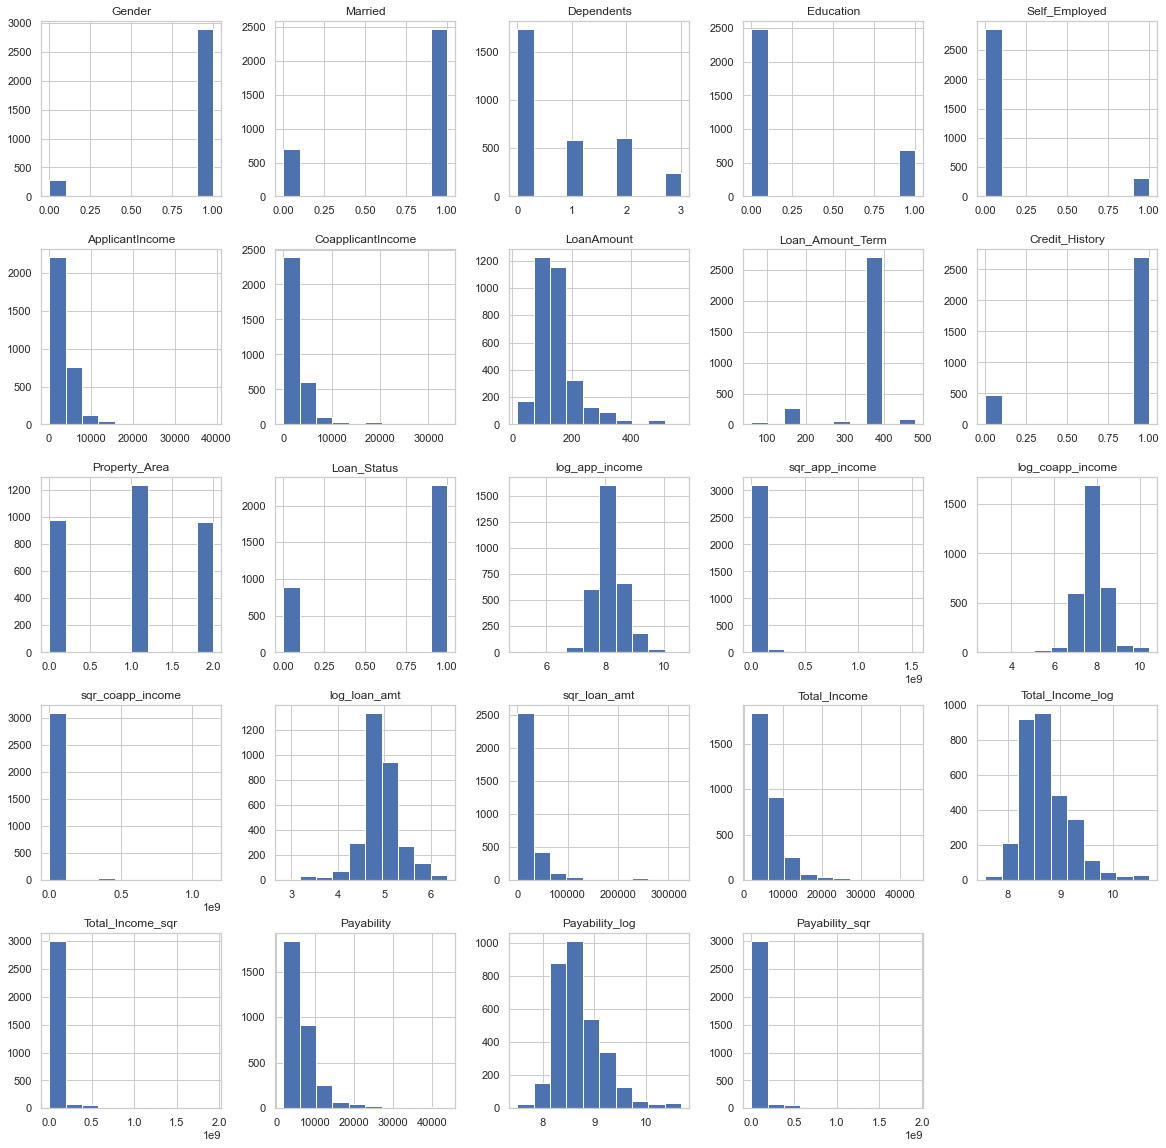

In [85]:
df.hist(figsize=(20,20))
plt.show()

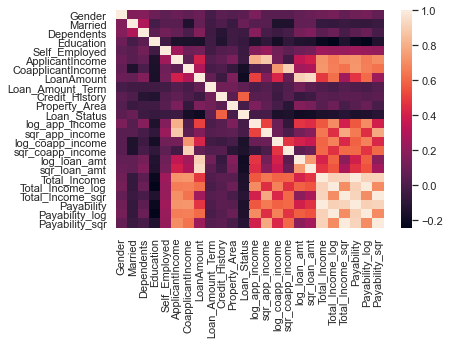

In [86]:
# Correlation matrix
# plot Corralation Matrix
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()


## Feature Engineering Part II

In [87]:
# Create Features out of Credit_History and Payability
df['Credit_History_Payability'] = df['Credit_History'] * df['Payability']

In [88]:
# Saving Loan_Status as a variable
y = df['Loan_Status']

# Getting rid of Loan_Status
df = df.drop('Loan_Status', axis=1)

# adding y to the dataset
df['Loan_Status'] = y

## Exporting Data Sets

In [89]:
# Export Testing Data frame
df.to_csv('loan_engineered.csv', index=False)
    